WE WANT IN THIS EXERCIDE TO PLOT 2 CHARTS ON THE SAME TIME, THE FIRST SHOWING THE DISTRIBUTION OF THE TOP SKILLS BASED ON SALARIES, THE SECOND SHOWING THE DISTRIBUTION OF THE MOST DEMANDED SKILLS BASED ON SALARIES

In [2]:
# Importing librairies
import matplotlib.pyplot as plt
import pandas as pd
from datasets import load_dataset
import ast

# Loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = pd.DataFrame(dataset['train'])

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skills : ast.literal_eval(skills) if pd.notna(skills) else skills)

In [3]:
# Filter for data analysts
df_da_us = df[(df['job_title_short']=='Data Analyst') & (df['job_country']=='United States')].copy()

C:\Users\Fils GUEDEGBE\AppData\Local\Temp\ipykernel_17376\2080140806.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(['${:,.0f}k'.format(x/1000) for x in ax[0].get_xticks()])
C:\Users\Fils GUEDEGBE\AppData\Local\Temp\ipykernel_17376\2080140806.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(['${:,.0f}k'.format(x/1000) for x in ax[1].get_xticks()])


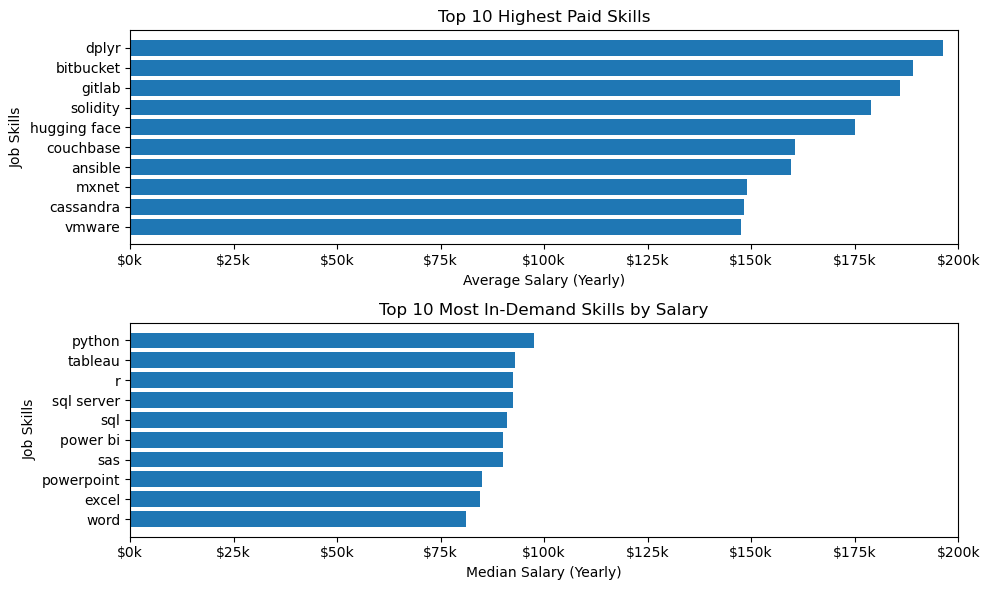

In [4]:
# Remove NaN values from the 'salary_year_avg' column
df_da_us = df_da_us.dropna(subset=['salary_year_avg'])
# Explode the 'job_skills' column to create rows for each skill
df_exploded = df_da_us.explode('job_skills')
fig, ax = plt.subplots(2, 1, figsize=(10, 6))

### TOP SKILLS BASED ON SALARY
# Calculate the average salaries by skill
salary_by_skill = df_exploded.groupby('job_skills')['salary_year_avg'].median().reset_index()
# Get the top 10 highest paid skills
top_paid_skills = salary_by_skill.nlargest(10, 'salary_year_avg')

# Create the plot
ax[0].barh(top_paid_skills['job_skills'], top_paid_skills['salary_year_avg'])
# Set the title and axis labels
ax[0].set_title('Top 10 Highest Paid Skills')
ax[0].set_xlabel('Average Salary (Yearly)')
ax[0].set_ylabel('Job Skills')
ax[0].set_xlim(right=200000)
# Format the x-axis values as dollar amounts
ax[0].set_xticklabels(['${:,.0f}k'.format(x/1000) for x in ax[0].get_xticks()])
ax[0].invert_yaxis()  # Invert the y-axis for the first plot

### TOP SKILLS BASED ON COUNT
# Get the top 10 most in-demand skills by median salary
top_demanded_skills = df_exploded['job_skills'].value_counts().head(10).index.tolist()
# Create a new DataFrame with only the top 10 top skills
df_skills = df_exploded[df_exploded['job_skills'].isin(top_demanded_skills)][['job_skills', 'salary_year_avg']]
# Calculate the median salaries by skill
median_salaries = df_skills.groupby('job_skills')['salary_year_avg'].median().reset_index()
median_salaries.sort_values(by='salary_year_avg', ascending=False, inplace=True)
# Create the plot
ax[1].barh(median_salaries['job_skills'], median_salaries['salary_year_avg'])
# Set the title and axis labels
ax[1].set_title('Top 10 Most In-Demand Skills by Salary')
ax[1].set_xlabel('Median Salary (Yearly)')
ax[1].set_ylabel('Job Skills')
ax[1].set_xlim(right=200000)
# Format the x-axis values as dollar amounts
ax[1].set_xticklabels(['${:,.0f}k'.format(x/1000) for x in ax[1].get_xticks()])
ax[1].invert_yaxis()  # Invert the y-axis for the second plot

# Display the plot
plt.tight_layout()
plt.show()
